# <center style="color:red"> **K-Means Clustering** </center>  

<h4 style="text-align:right">By Trần Minh Dương</h4>  

# Overview  

K-means clustering is a partitioning method that divides a dataset into ‘k’ distinct, non-overlapping subsets (clusters) based on similarity, aiming to minimize the variance within each cluster.

# Steps
1. Choose the Number of Clusters (k) + Initialize Cluster Centers
    - Decide how many clusters you want.
    
    - Randomly select k data points as the initial cluster centers (centroids).

2. Assign Points to the Nearest Cluster
    - Compute the Euclidean distance from each data point to all centroids.

    - Assign each point to the nearest centroid.

3. Compute New Centroids
    - For each cluster, compute the mean of all assigned points.

    - Move the centroid to this new location.

4. Repeat Until Convergence
    - Repeat Steps 3 & 4 until centroids no longer move significantly.

    - This ensures stability in cluster assignments.

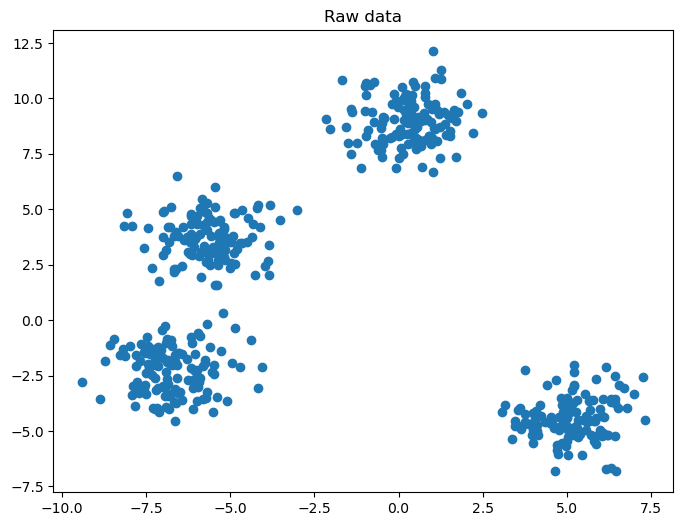

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples = 500,n_features = 2,centers = 4,random_state = 23)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1])
plt.title("Raw data")
plt.show()


## Step 1: Choose the number of clusters k + Initialize Cluster Centers


Centroids: 
 [[0.37 0.95]
 [0.73 0.6 ]
 [0.16 0.16]
 [0.06 0.87]]


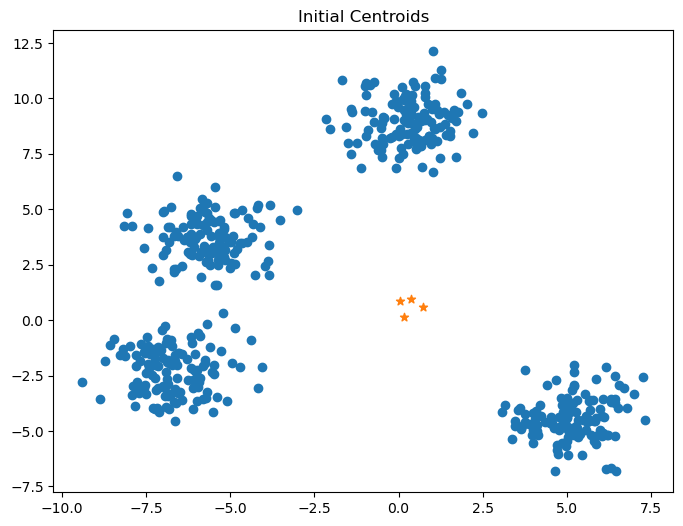

In [44]:
k = 4
np.random.seed(42)
centroids = np.array(np.random.random((k,X.shape[1])))
print("Centroids: \n",np.array_str(centroids,precision=2,suppress_small=True))

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1])
plt.scatter(centroids[:,0],centroids[:,1],marker="*")
plt.title("Initial Centroids")
plt.show()


## Step 2: Assign Points to the Nearest Cluster
+ Compute the Euclidean distance from each data point to all centroids.

+ Assign each point to the nearest centroid.

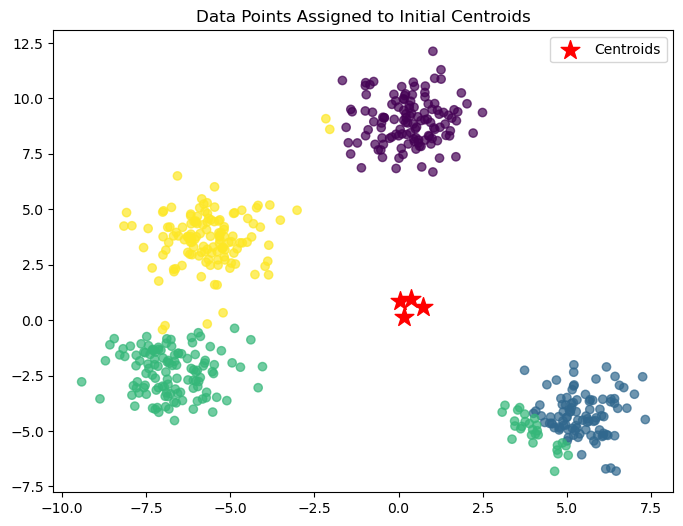

In [45]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

clusters = np.zeros(len(X))

for i,point in enumerate(X):
    distances = np.array([distance(point,centroid) for centroid in centroids])
    clusters[i] = np.argmin(distances)

# Visualize initial cluster assignments
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='viridis', alpha=0.7)
plt.scatter(centroids[:,0], centroids[:,1], marker="*", c='red', s=200, label='Centroids')
plt.title("Data Points Assigned to Initial Centroids")
plt.legend()
plt.show()

## Step 3: Compute New Centroids
- For each cluster, compute the mean of all assigned points.

- Move the centroid to this new location.

In [46]:
for i in range(k):
    centroids[i] = np.mean(X[clusters==i],axis = 0)

print("Updated Centroids: \n", centroids)

Updated Centroids: 
 [[ 0.329603    8.97830678]
 [ 5.47215895 -4.26398782]
 [-4.78323597 -2.82508097]
 [-5.64445975  3.69952589]]


## Step 4: Repeat until convergence

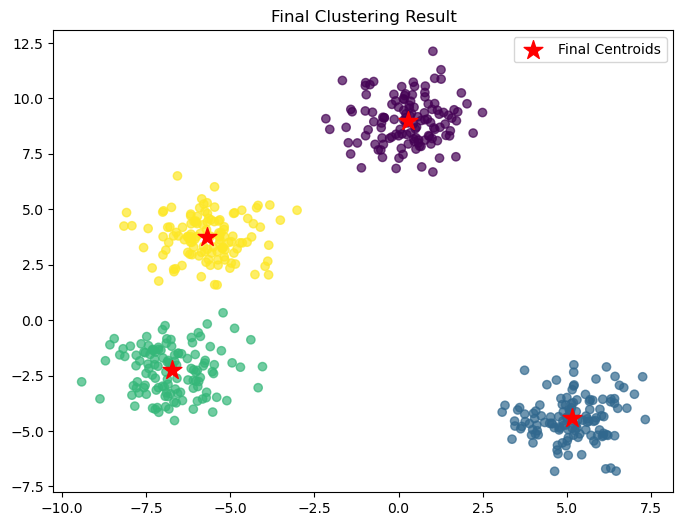

In [47]:
max_iter = 100
clusters = np.zeros(len(X),dtype=int)
for _ in range(max_iter):
    #Assign points to nearest centroid
    for (i,point) in enumerate(X):
        distances = np.array([distance(point,centroid) for centroid in centroids])
        clusters[i] = np.argmin(distances)

    #Compute new centroids
    for j in range(k):
        centroids[j] = np.mean(X[clusters==j],axis=0)    

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='viridis', alpha=0.7)
plt.scatter(centroids[:,0], centroids[:,1], marker="*", c='red', s=200, label='Final Centroids')
plt.title("Final Clustering Result")
plt.legend()
plt.show()